In [11]:
import cv2
import numpy as np
import os
import re
import tqdm as tqdm
import matplotlib.pyplot as plt

from keras.layers import Dense, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import load_model, Sequential
from keras.optimizers import Adam

TRAIN_DIR = 'train/'
TEST_DIR = 'test/'
IMG_SIZE = 100

In [12]:
def label_img(img):
    img_class = re.split("[_.]", img)[1]
    
    a = [0 for j in range(3)]
    
    a[int(img_class)-1] = 1
    
    return a

In [13]:
def create_train():
    train = []
    for img in os.listdir(TRAIN_DIR):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        image = cv2.imread(path, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        train.append([image, np.array(label)])
    np.save("train.npy", train)
    return train

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


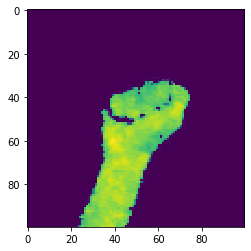

In [14]:
train = create_train()
# train = np.load("train.npy", allow_pickle=True)
print(train[0][0])
plt.imshow(train[0][0])

In [15]:
def create_test():
    test = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        image = cv2.imread(path, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        test.append([image, np.array(label)])
    np.save("test.npy", test)
    return test

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


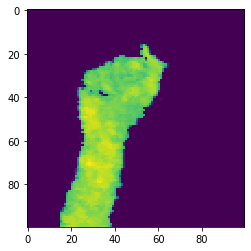

In [16]:
test = create_test()
# train = np.load("train.npy", allow_pickle=True)
print(test[0][0])
plt.imshow(test[0][0])

In [17]:
train_X_list = []
train_Y_list = []
test_X_list = []
test_Y_list = []

for i in range(len(train)):
    train_X_list.append(train[i][0].reshape(IMG_SIZE, IMG_SIZE, 1))
    train_Y_list.append(train[i][1])

for i in range(len(test)):
    test_X_list.append(test[i][0].reshape(IMG_SIZE, IMG_SIZE, 1))
    test_Y_list.append(test[i][1])
    
train_X = np.array(train_X_list)
train_Y = np.array(train_Y_list)
test_X = np.array(test_X_list)
test_Y = np.array(test_Y_list)

input_shape = (IMG_SIZE, IMG_SIZE, 1)

In [18]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))

optimizer = Adam(lr=0.0001)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 16)        4624      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
__________

In [21]:
model.fit(train_X, train_Y, epochs=10, validation_data=(test_X, test_Y), verbose=2)

Train on 240 samples, validate on 60 samples
Epoch 1/10
 - 0s - loss: 0.2263 - acc: 0.9917 - val_loss: 0.1976 - val_acc: 0.9833
Epoch 2/10
 - 0s - loss: 0.1925 - acc: 0.9875 - val_loss: 0.1485 - val_acc: 1.0000
Epoch 3/10
 - 0s - loss: 0.1720 - acc: 0.9875 - val_loss: 0.1234 - val_acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.1564 - acc: 0.9875 - val_loss: 0.1092 - val_acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.2140 - acc: 0.9833 - val_loss: 0.1094 - val_acc: 0.9833
Epoch 6/10
 - 0s - loss: 0.0927 - acc: 0.9958 - val_loss: 0.0746 - val_acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0928 - acc: 0.9792 - val_loss: 0.0524 - val_acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0593 - acc: 1.0000 - val_loss: 0.0408 - val_acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0852 - acc: 0.9958 - val_loss: 0.0336 - val_acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0579 - acc: 0.9958 - val_loss: 0.0281 - val_acc: 1.0000


In [22]:
model.save("hand_model.h5")

In [65]:
pred = model.predict(test[0][0].reshape(1,IMG_SIZE,IMG_SIZE,1))

In [64]:
print(pred)

[[9.9996865e-01 6.0755210e-06 6.4091694e-08 3.9369447e-10 3.9371891e-08
  6.9994370e-09 2.2768449e-05 2.1337744e-06 1.0692412e-07 8.2959964e-08]]
